# Pairs Trading

Pairs trading is a form of mean-reversion quantitative strategy. In pairs trading, there are two different different equities that are traded and have a very high correlation value associated with each other. The assumption here is that these two equities have a stationary value where they will converge to whenever they begin to diverge. When these equities begin converging to this stationary value, trades are executed related to a short or long position.

Importing packages and retrieving 1 year of stock data using `yfinance`.

In [8]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import seaborn as sns
from matplotlib.pyplot import figure

def get_data(tickers):
    data = pd.DataFrame()
    names = list()

    for tick in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(tick, start=datetime(2022, 10, 27), end=datetime(2023, 10, 27)).iloc[:,4])], axis = 1)
        names.append(tick)

    data.columns = names
    return data

tickers = ["AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX","AMZN", "BA", "WMT","CMG","GS","XOM","NKE","INTC", "META","BRK-B", "MSFT"] 
stock_data = get_data(tickers)

stock_data.tail()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,AAPL,GOOG,AMD,GME,SPY,NFLX,AMZN,BA,WMT,CMG,GS,XOM,NKE,INTC,META,BRK-B,MSFT
Date,,,,,,,,,,,,,,,,,
2023-10-20,171.999863,136.405014,101.809998,13.44,416.845093,400.959991,125.169998,180.039993,52.215137,36.625000,292.006958,107.317192,101.113297,34.345562,308.017029,335.859985,324.236298
2023-10-23,172.119247,137.562164,100.010002,13.44,416.122620,406.839996,126.559998,181.029999,52.955143,36.393200,291.199249,105.742409,101.251167,33.293171,313.366058,336.839996,326.866516
2023-10-24,172.557007,139.776733,101.669998,14.04,419.259949,413.730011,128.559998,182.360001,53.691868,37.101799,291.160309,104.718315,103.585236,34.021000,311.909027,338.630005,328.067505
2023-10-25,170.228912,126.359680,96.059998,13.71,413.242615,411.250000,121.389999,177.729996,53.530708,36.837399,288.805176,104.911552,101.970100,32.289951,298.915741,336.899994,338.131958
2023-10-26,166.040359,123.137604,93.669998,13.50,408.294220,403.540009,119.570000,179.089996,53.205105,36.129398,289.028992,103.955078,98.503479,31.985046,287.758667,336.160004,325.447205


Next, we need to find the correlations between all of the pairs in our data.

In [6]:
correlation_matrix = stock_data.corr()
correlation_matrix

,AAPL,GOOG,AMD,GME,SPY,NFLX,AMZN,BA,WMT,CMG,GS,XOM,NKE,INTC,META,BRK-B,MSFT
AAPL,1.000000,0.868021,0.926885,-0.040056,0.923061,0.849538,0.901260,0.489047,0.774860,0.914949,-0.449356,-0.043326,-0.331529,0.794059,0.921944,0.788830,0.959371
GOOG,0.868021,1.000000,0.850978,-0.314211,0.900151,0.812996,0.951157,0.396521,0.890566,0.783993,-0.487351,0.144000,-0.500188,0.898312,0.934049,0.903245,0.917446
AMD,0.926885,0.850978,1.000000,-0.074643,0.869305,0.847477,0.858700,0.589583,0.679043,0.885239,-0.490715,-0.108925,-0.232427,0.741423,0.910948,0.729732,0.943149
GME,-0.040056,-0.314211,-0.074643,1.000000,-0.167231,-0.112100,-0.207234,-0.192251,-0.293026,-0.000783,0.431301,-0.308912,0.023417,-0.262902,-0.368922,-0.352351,-0.194852
SPY,0.923061,0.900151,0.869305,-0.167231,1.000000,0.932366,0.950676,0.617639,0.861746,0.824189,-0.276935,0.104271,-0.332360,0.872356,0.922222,0.921360,0.922689
NFLX,0.849538,0.812996,0.847477,-0.112100,0.932366,1.000000,0.897203,0.655303,0.745678,0.789582,-0.305061,-0.005493,-0.261513,0.775985,0.854278,0.824269,0.865251
AMZN,0.901260,0.951157,0.858700,-0.207234,0.950676,0.897203,1.000000,0.478082,0.868844,0.805317,-0.405372,0.106875,-0.493786,0.887293,0.926514,0.918348,0.917078
BA,0.489047,0.396521,0.589583,-0.192251,0.617639,0.655303,0.478082,1.000000,0.322335,0.484419,-0.092206,0.038069,0.331933,0.385548,0.554667,0.512422,0.503143
WMT,0.774860,0.890566,0.679043,-0.293026,0.861746,0.745678,0.868844,0.322335,1.000000,0.685590,-0.314461,0.249897,-0.515586,0.891206,0.825030,0.931949,0.823150
CMG,0.914949,0.783993,0.885239,-0.000783,0.824189,0.789582,0.805317,0.484419,0.685590,1.000000,-0.458591,-0.087038,-0.157777,0.665407,0.844292,0.707465,0.926793


Use a heatmap to eaier visualise correlations (lighter colours = higher correlation)

<Axes: >

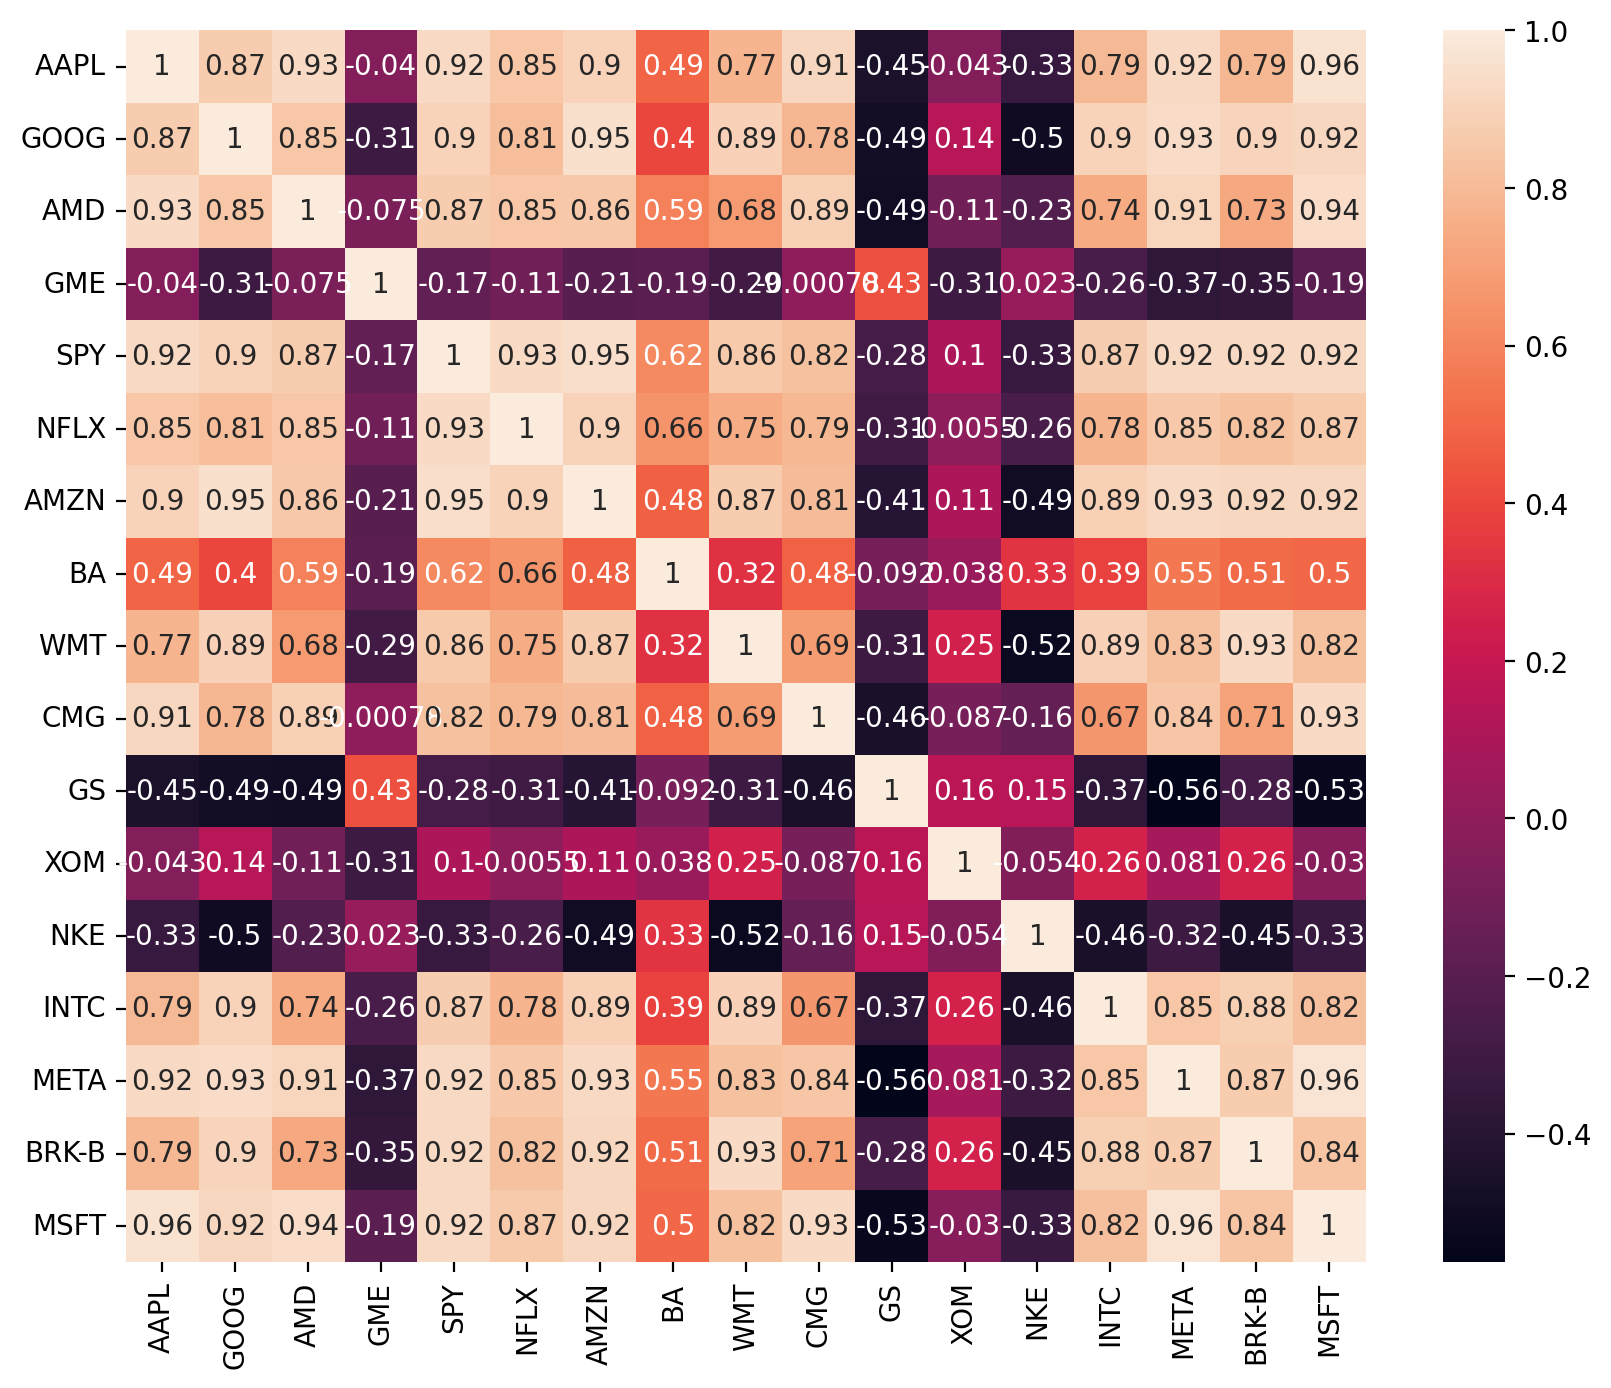

In [10]:
figure(figsize=(10, 8), dpi=200)
sns.heatmap(correlation_matrix, annot = True)